In [115]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [116]:
iris = ds.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [117]:
plt.style.use('default')
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [118]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [119]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [120]:
df['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [121]:
setosa_df = df[df.target==0] 
versicolor_df = df[df.target==1]
virginica_df = df[df.target==2]

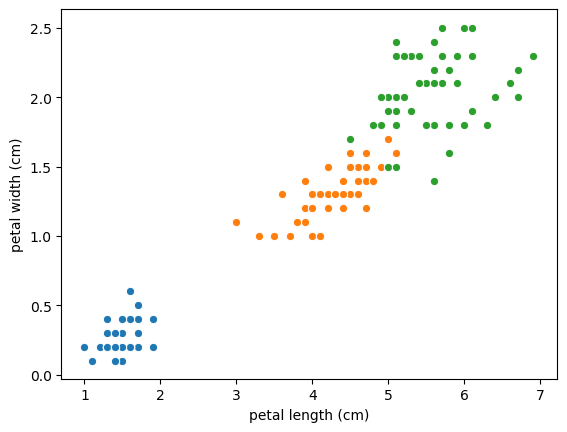

In [122]:
#plt.scatter(setosa_df['sepal length (cm)'],setosa_df['sepal width (cm)'],color='green')
sb.scatterplot(data = setosa_df,x='petal length (cm)',y='petal width (cm)')
sb.scatterplot(data = versicolor_df,x='petal length (cm)',y='petal width (cm)')
sb.scatterplot(data = virginica_df,x='petal length (cm)',y='petal width (cm)')

In [123]:
X = df.drop(['target','target_name'],axis='columns')
Y = df.target

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
model = SVC(kernel='poly')
model.fit(X_train,y_train)
#model.predict(X_test)
model.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9333333333333333

In [125]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_predict,y_test)
cm

array([[ 1, 13, 15],
       [ 0,  0,  0],
       [14,  2,  0]], dtype=int64)

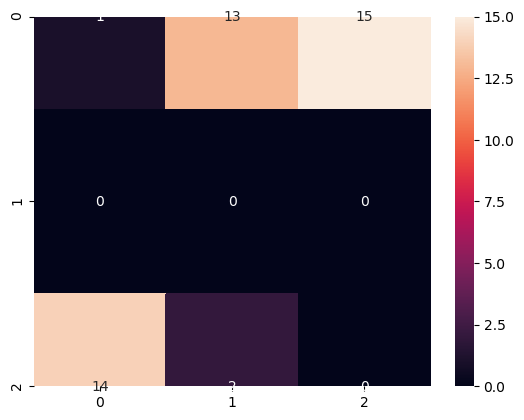

In [126]:
sb.heatmap(cm,annot=True)